# Where are the most popular Airbnb locations in NYC?

***


In [1]:
%matplotlib inline

import pandas as pd
import json
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in CSV data files
airbnb = pd.read_csv('zip_clean.csv',index_col=0)
airbnb15 = pd.read_csv('airbnb15.csv',index_col=0)
airbnb16 = pd.read_csv('airbnb16.csv',index_col=0)
airbnb17 = pd.read_csv('airbnb17.csv',index_col=0)
airbnb17_count = pd.read_csv('airbnb17_count.csv',index_col=0)
airbnb17_countavg = pd.read_csv('airbnb17_countavg.csv',index_col=0)
topzip17 = pd.read_csv('topzip17.csv',index_col=0)
norm17 = pd.read_csv('norm17.csv',index_col=0)
air_zillow = pd.read_csv('airzillow_df.csv', index_col=0)

## Where are the most Airbnbs located in NYC?

In the below bar graphs, it becomes apparent that particular zipcodes had the most Airbnbs during the 2017 year. The top 3 zipcodes are 11211, 11221, and 11206. Respectively, these neighborhoods are Williamsburg/Greenpoint, Bed-Stuy/Bushwick, and Bushwick/Williamsburg. If you look at these areas on the map, you'll notice that these locations are all in Brooklyn and within close proximity of each other.

<Figure size 432x288 with 0 Axes>

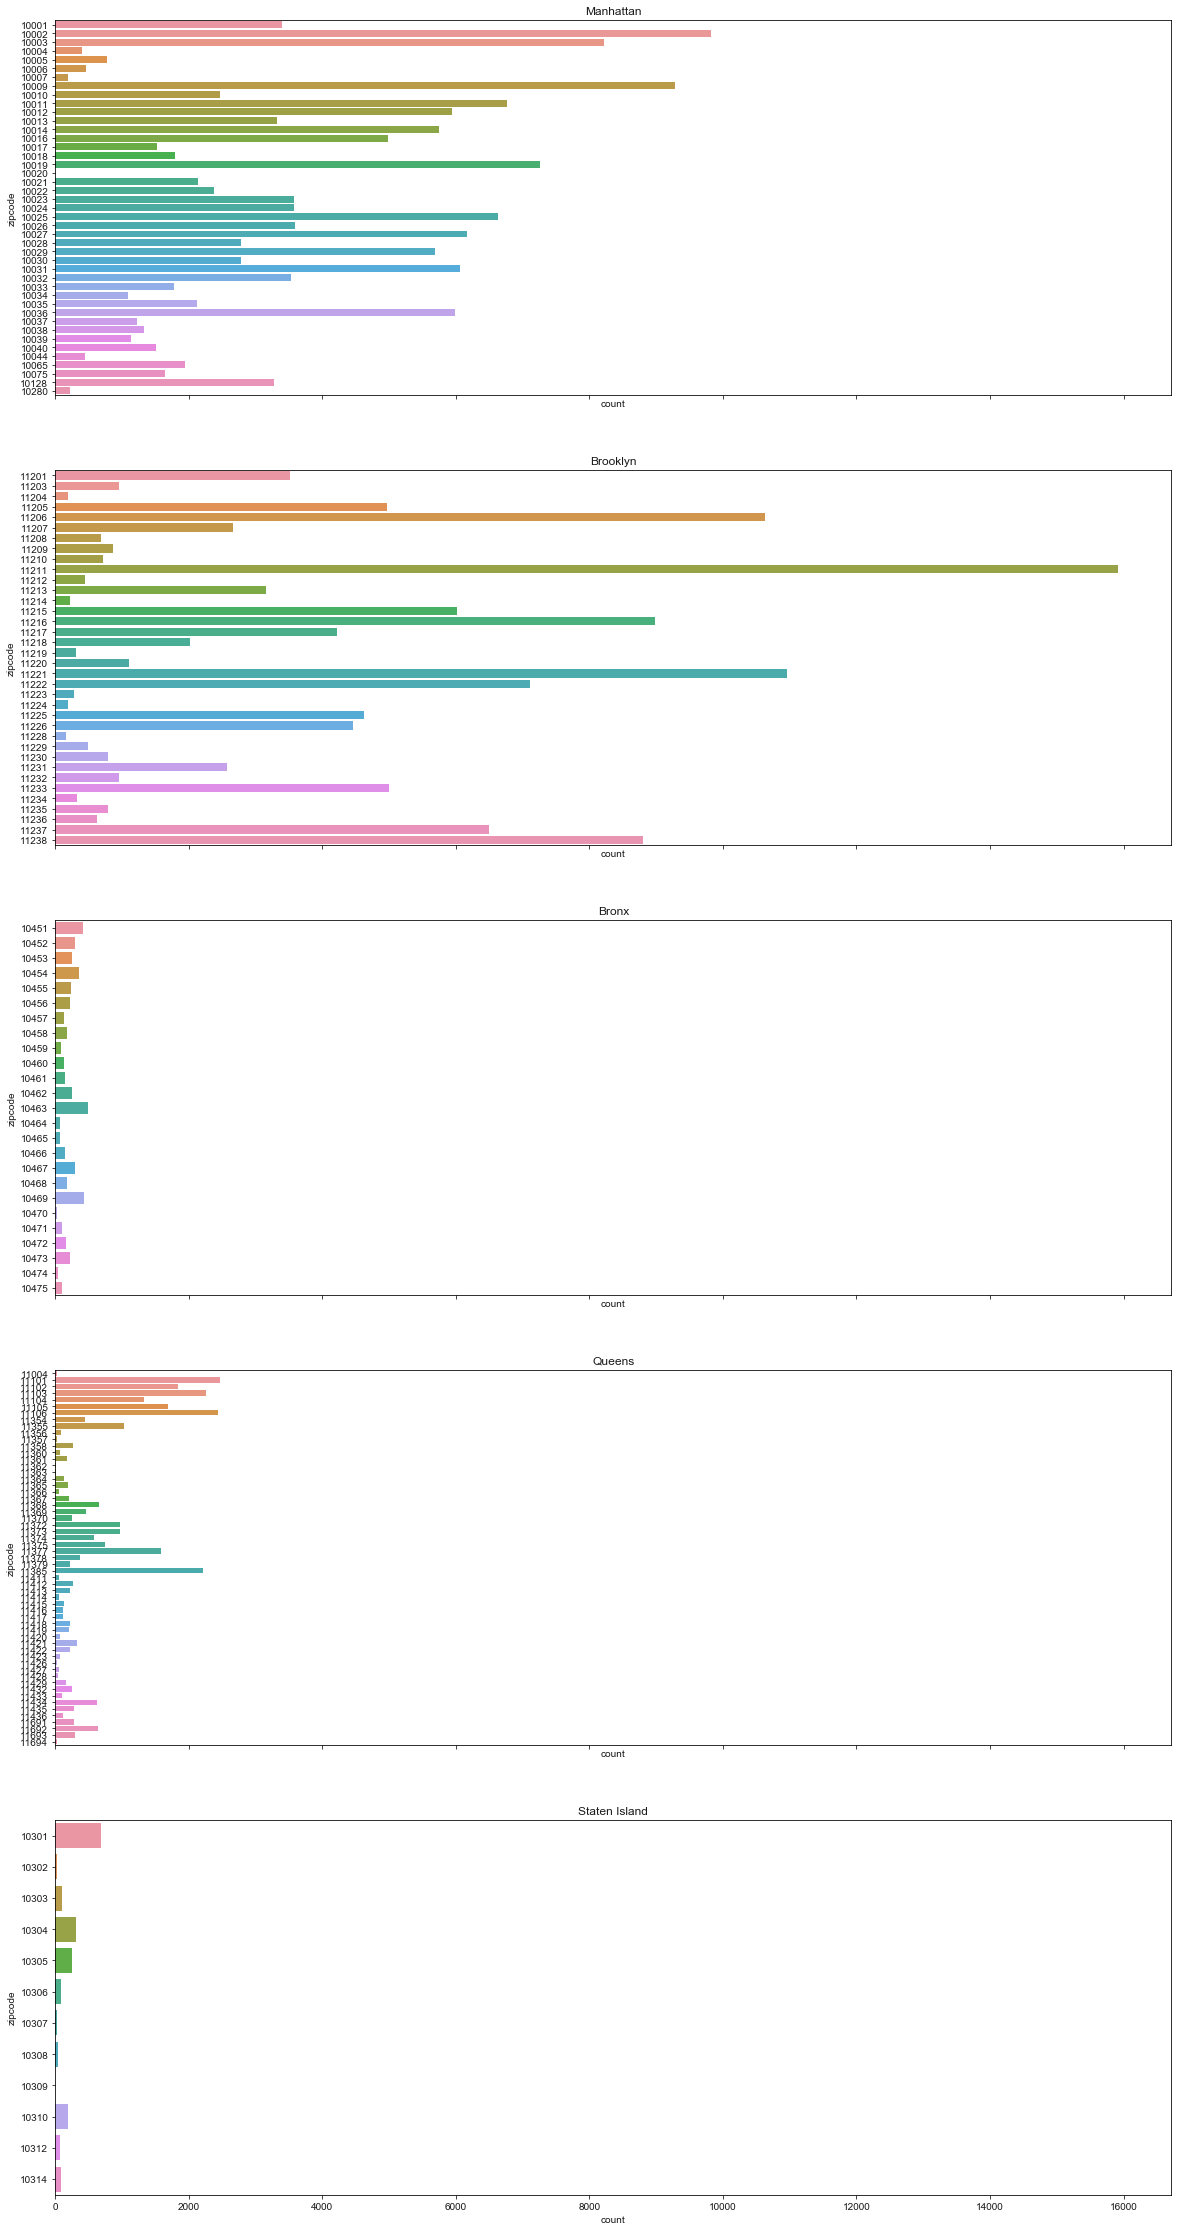

In [3]:
#NYC Airbnb's roomtypes from 2017 period
fig = plt.figure()
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,figsize=(20,40),sharex=True)

sns.set(style="whitegrid", color_codes=True)

manhattan_zips = ['10026', '10027', '10030', '10037', '10039','10001', '10011', '10018', '10019', '10020', '10036', '10029', '10035', '10010', '10016', '10017', '10022', '10012', '10013', '10014', '10004', '10005', '10006', '10007', '10038', '10280', '10002', '10003', '10009', '10021', '10028', '10044', '10065', '10075', '10128', '10023', '10024', '10025', '10031', '10032', '10033', '10034', '10040']
manhattan = airbnb17[airbnb17['zipcode'].isin(manhattan_zips)]
ax1.set_title("Manhattan")
sns.countplot(y="zipcode", data=manhattan, ax=ax1)

brooklyn_zips = ['11212', '11213', '11216', '11233', '11238', '11209', '11214', '11228', '11204', '11218', '11219', '11230', '11234', '11236', '11239', '11223', '11224', '11229', '11235', '11201', '11205', '11215', '11217', '11231', '11203', '11210', '11225', '11226', '11207', '11208', '11211', '11222', '11220', '11232', '11206', '11221', '11237']
brooklyn = airbnb17[airbnb17['zipcode'].isin(brooklyn_zips)]
ax2.set_title("Brooklyn")
sns.countplot(y="zipcode", data=brooklyn, ax=ax2)

bronx_zips = ['10453', '10457', '10460', '10458', '10467', '10468', '10451', '10452', '10456', '10454', '10455', '10459', '10474', '10463', '10471', '10466', '10469', '10470', '10475', '10461', '10462','10464', '10465', '10472', '10473']
bronx = airbnb17[airbnb17['zipcode'].isin(bronx_zips)]
sns.countplot(y="zipcode", data=bronx, ax=ax3)
ax3.set_title("Bronx")

queens_zips = ['11361', '11362', '11363', '11364', '11354', '11355', '11356', '11357', '11358', '11359', '11360', '11365', '11366', '11367', '11412', '11423', '11432', '11433', '11434', '11435', '11436', '11101', '11102', '11103', '11104', '11105', '11106', '11374', '11375', '11379', '11385', '11691', '11692', '11693', '11694', '11695', '11697', '11004', '11005', '11411', '11413', '11422', '11426', '11427', '11428', '11429', '11414', '11415', '11416', '11417', '11418', '11419', '11420', '11421', '11368', '11369', '11370', '11372', '11373', '11377', '11378']
queens = airbnb17[airbnb17['zipcode'].isin(queens_zips)]
sns.countplot(y="zipcode", data=queens, ax=ax4)
ax4.set_title("Queens")

staten_zips = ['10302', '10303', '10310', '10306', '10307', '10308', '10309', '10312', '10301', '10304', '10305', '10314']
staten = airbnb17[airbnb17['zipcode'].isin(staten_zips)]
sns.countplot(y="zipcode", data=staten, ax=ax5)
ax5.set_title("Staten Island")

plt.show()

In [6]:
import folium

In [7]:
abnb_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

abnb_map.choropleth(geo_data="nyczip.geojson",
                     fill_opacity=0.5, line_opacity=0.5
                     ) 

In [8]:
airbnb17_countv2 = airbnb17_count[['zipcode','airbnb_count','pop10','lat','long','norm_count']].groupby(['zipcode'], as_index=False).agg('mean')
abnbmap = airbnb17_countv2[['zipcode','airbnb_count','lat','long']]

In [9]:
for index, row in abnbmap.iterrows():
    radius = row["airbnb_count"]/50.0
    folium.CircleMarker(location=(row[2],
                                  row[3]),
                        radius=radius,
                        color='green',
                        fill=True).add_to(abnb_map)

### Where are the most Airbnbs located in NYC (spatially)?

By mapping out the number of Airbnbs per zipcode, it is more easily apparent to see that there's a focus of Airbnbs in the lower Manhattan and adjacent Brooklyn area. It is however interesting that the next prominent area appears to be the upper west side of Manhattan is the next focal point of Airbnb locations.

The Second Airbnb Focus: Morningside Heights/Hamilton Heights/Harlem
What's peculiar about the second location is that it is far from typical tourist attractions and "viral video" locations. This begs to ask:
* **Are there more Airbnbs here because people living in these areas are in need of more income and open their homes?**
    *What are the demographics of the people who live in these neighborhoods?
    *Are they typically families, a couple, or a single person?
    *What does their income look like in relation to the rent prices in the neighborhood?
* **Are there more Airbnbs here because tourists want to be in this location?**
    *Is there value here for tourists or is it a price point issue?
    *Is it due to the cultural history there (Harlem, Apollo Theater, The Cotton Club)?
    *Are tourists there to tour the college campuses in the area?
    *Are tourists there because it's convenient (A/B/C/D and the '4/5/6 train' lines connect this secondary Airbnb focal point to the primary Airbnb location focal point in Midtown to Lower Manhattan)?

In [10]:
abnb_map

## Are these zipcode locations "popular" due to population density in those areas? Which locations are more popular in respect to the population?

It's possible that the varying populations of each zipcode could inflate the data. It was thus normalized by population by using [2010 census data](https://www.census.gov/geo/maps-data/data/gazetteer2010.html) and was then averaged for the 2017 year. Notably, the Airbnbs with regard to population tend toward Manhattan with the top 3 zipcodes being 10018, 10036, and 10012. The first two zipcodes encompass the neighborhoods of Midtown West and Clinton (near 42nd street) while the third zipcode straddles NoHo and SoHo.



*Note that zipcode 10020 was dropped in the data since it was recorded as having "0" population. It only accounted for 2 datapoints out of 1719.

<Figure size 432x288 with 0 Axes>

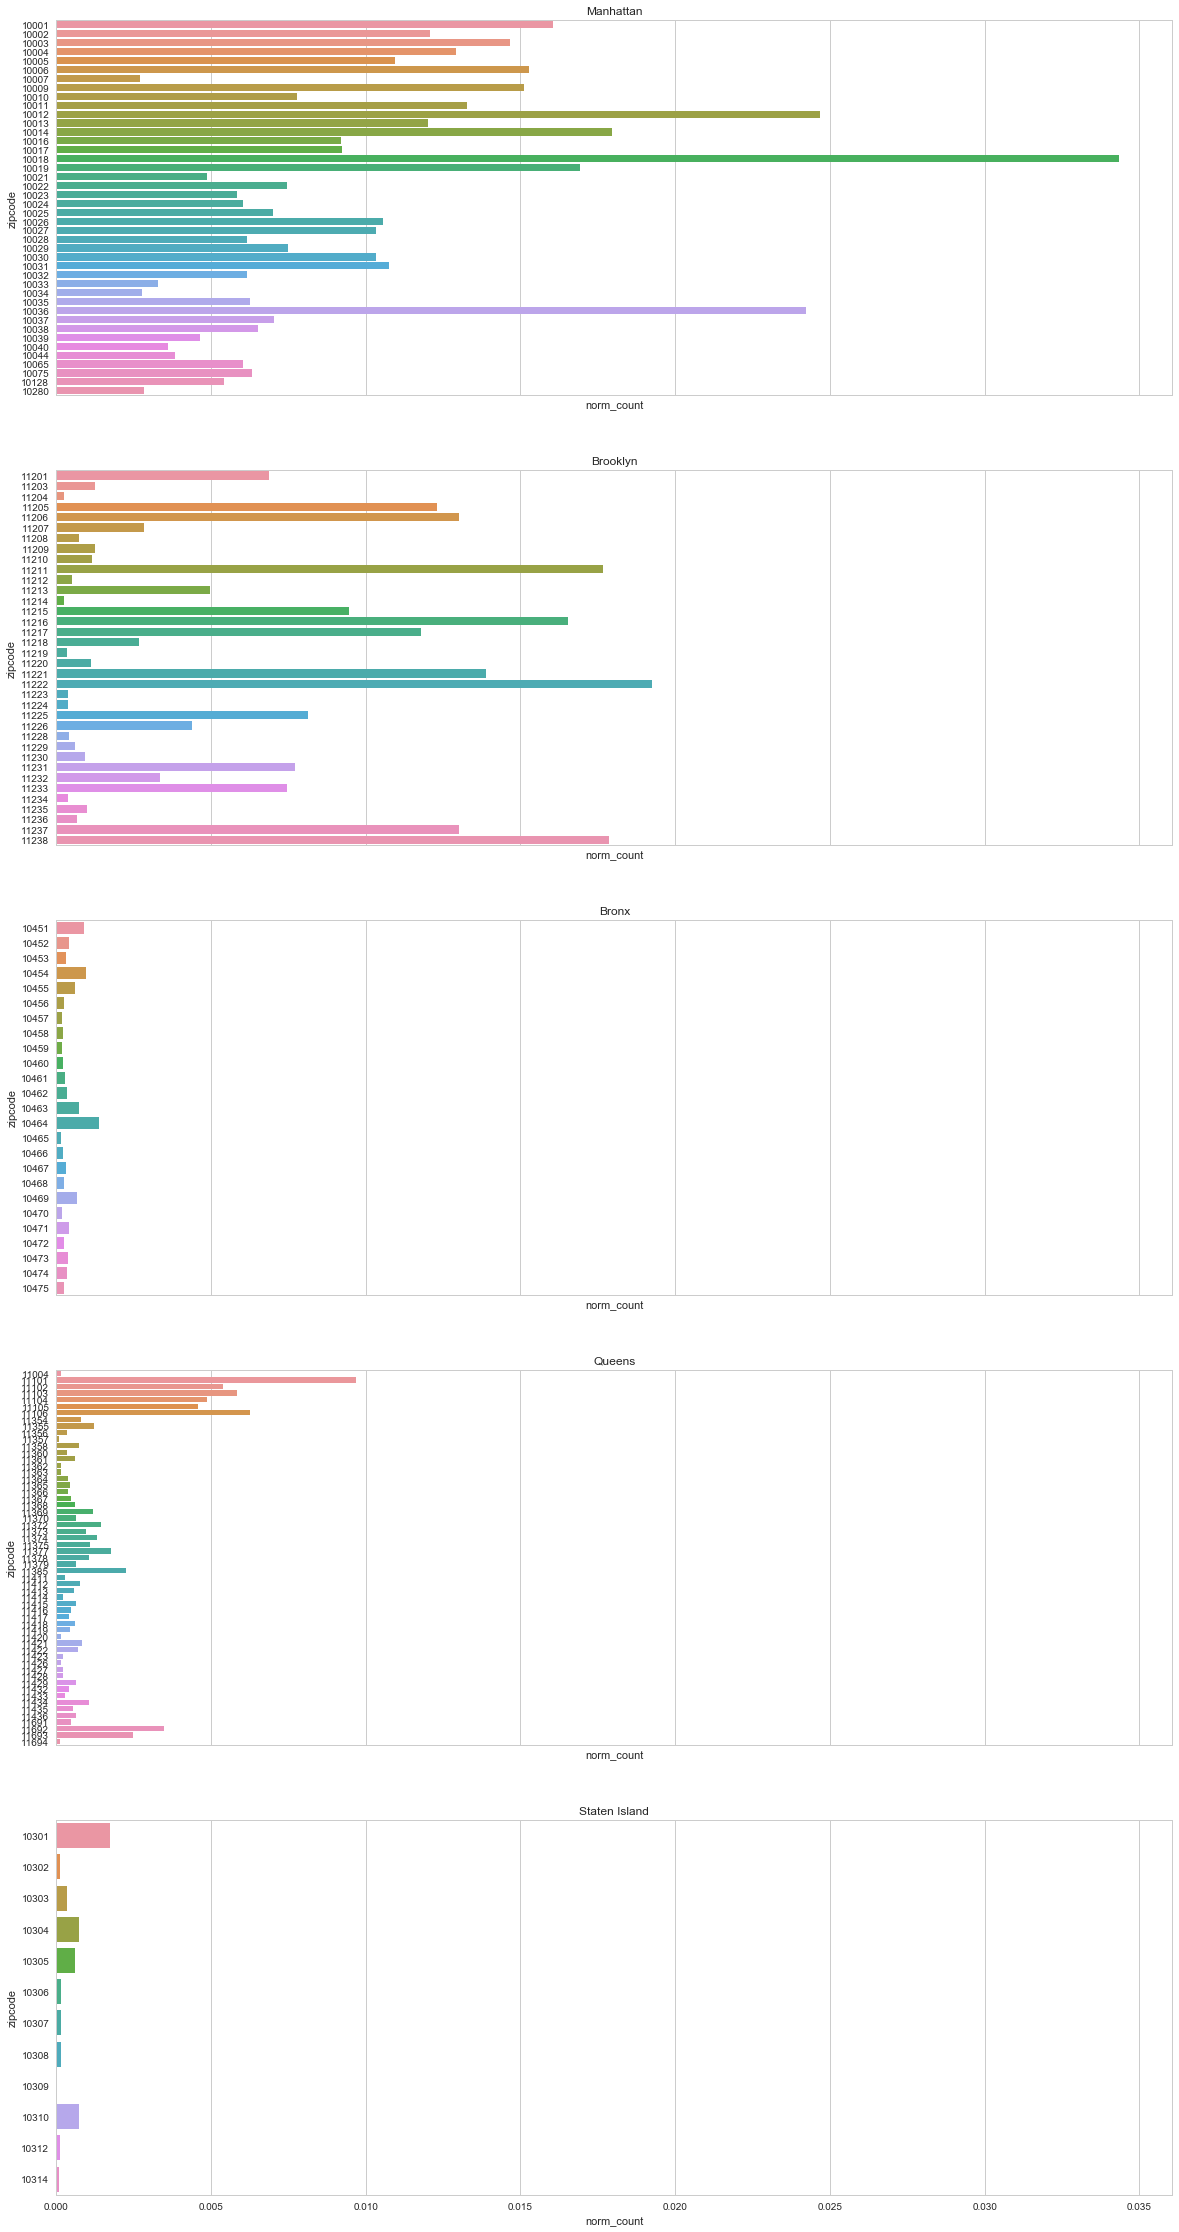

In [11]:
#NYC Airbnb's roomtypes from 2017 period
fig = plt.figure()
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,figsize=(20,40),sharex=True)

sns.set(style="whitegrid", color_codes=True)

manhattan_zips = ['10026', '10027', '10030', '10037', '10039','10001', '10011', '10018', '10019', '10020', '10036', '10029', '10035', '10010', '10016', '10017', '10022', '10012', '10013', '10014', '10004', '10005', '10006', '10007', '10038', '10280', '10002', '10003', '10009', '10021', '10028', '10044', '10065', '10075', '10128', '10023', '10024', '10025', '10031', '10032', '10033', '10034', '10040']
manhattan_count = airbnb17_countavg[airbnb17_countavg['zipcode'].isin(manhattan_zips)]
ax1.set_title("Manhattan")
sns.barplot(x="norm_count", y="zipcode", data=manhattan_count, ax=ax1, orient="h", ci=None)

brooklyn_zips = ['11212', '11213', '11216', '11233', '11238', '11209', '11214', '11228', '11204', '11218', '11219', '11230', '11234', '11236', '11239', '11223', '11224', '11229', '11235', '11201', '11205', '11215', '11217', '11231', '11203', '11210', '11225', '11226', '11207', '11208', '11211', '11222', '11220', '11232', '11206', '11221', '11237']
brooklyn_count = airbnb17_countavg[airbnb17_countavg['zipcode'].isin(brooklyn_zips)]
ax2.set_title("Brooklyn")
sns.barplot(x="norm_count", y="zipcode", data=brooklyn_count, ax=ax2, orient="h", ci=None)

bronx_zips = ['10453', '10457', '10460', '10458', '10467', '10468', '10451', '10452', '10456', '10454', '10455', '10459', '10474', '10463', '10471', '10466', '10469', '10470', '10475', '10461', '10462','10464', '10465', '10472', '10473']
bronx_count = airbnb17_countavg[airbnb17_countavg['zipcode'].isin(bronx_zips)]
sns.barplot(x="norm_count", y="zipcode", data=bronx_count, ax=ax3, orient="h", ci=None)
ax3.set_title("Bronx")

queens_zips = ['11361', '11362', '11363', '11364', '11354', '11355', '11356', '11357', '11358', '11359', '11360', '11365', '11366', '11367', '11412', '11423', '11432', '11433', '11434', '11435', '11436', '11101', '11102', '11103', '11104', '11105', '11106', '11374', '11375', '11379', '11385', '11691', '11692', '11693', '11694', '11695', '11697', '11004', '11005', '11411', '11413', '11422', '11426', '11427', '11428', '11429', '11414', '11415', '11416', '11417', '11418', '11419', '11420', '11421', '11368', '11369', '11370', '11372', '11373', '11377', '11378']
queens_count = airbnb17_countavg[airbnb17_countavg['zipcode'].isin(queens_zips)]
sns.barplot(x="norm_count", y="zipcode", data=queens_count, ax=ax4, orient="h", ci=None)
ax4.set_title("Queens")

staten_zips = ['10302', '10303', '10310', '10306', '10307', '10308', '10309', '10312', '10301', '10304', '10305', '10314']
staten_count = airbnb17_countavg[airbnb17_countavg['zipcode'].isin(staten_zips)]
sns.barplot(x="norm_count", y="zipcode", data=staten_count, ax=ax5, orient="h", ci=None)
ax5.set_title("Staten Island")

plt.show()

In [12]:
#Add coordinate data to dataframe normalized for population density
latlong = airbnb17_countv2[['zipcode','lat','long']]
airbnb17_countv3 = pd.merge(airbnb17_countavg,latlong,how='left',on='zipcode')

In [13]:
abnbnorm_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

abnbnorm_map.choropleth(geo_data="nyczip.geojson",
                     fill_opacity=0.5, line_opacity=0.5
                     ) 

for index, row in airbnb17_countv3.iterrows():
    radius = row["norm_count"]*1000.0
    folium.CircleMarker(location=(row[4],
                                  row[5]),
                        radius=radius,
                        color='green',
                        fill=True).add_to(abnbnorm_map)

## Where are most Airbnbs in NYC after accounting for population density (spatially)?

Spatially, we can see a shift in popular areas for Airbnbs from the west side of Brooklyn and the east side of Manhattan in the prior map to primarily the southern tip and west side of Manhattan in this normalized map. However, the locations in the last map are still prominent locations regardless of their populations.

In [14]:
abnbnorm_map

In [15]:
abnboverlap_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

abnboverlap_map.choropleth(geo_data="nyczip.geojson",
                     fill_opacity=0.5, line_opacity=0.5
                     ) 

for index, row in abnbmap.iterrows():
    radius = row["airbnb_count"]/50.0
    folium.CircleMarker(location=(row[2],
                                  row[3]),
                        radius=radius,
                        color='green',
                        fill=True).add_to(abnboverlap_map)
    
for index, row in airbnb17_countv3.iterrows():
    radius = row["norm_count"]*1000.0
    folium.CircleMarker(location=(row[4],
                                  row[5]),
                        radius=radius,
                        color='yellow',
                        fill=True).add_to(abnboverlap_map)

abnboverlap_map

# Out of the zipcodes with high Airbnb-to-population ratios, which are priced the highest?

Out of 173 zipcodes, I sorted for areas where there was at least 1 Airbnb per 100 people and got a list of 35 zipcodes. Top 5 are: 10017, 10013, 10014, 10018, 10001
10017 = Murray Hill|East Side|Midtown --> Oddly this is east side.
10013 = Tribeca|Downtown|Manhattan
10014 = Meatpacking District|Downtown|Manhattan
10018 = Clinton|Midtown West|West Side|Manhattan
10001 = Chelsea

**Note to self --> Create choropleth

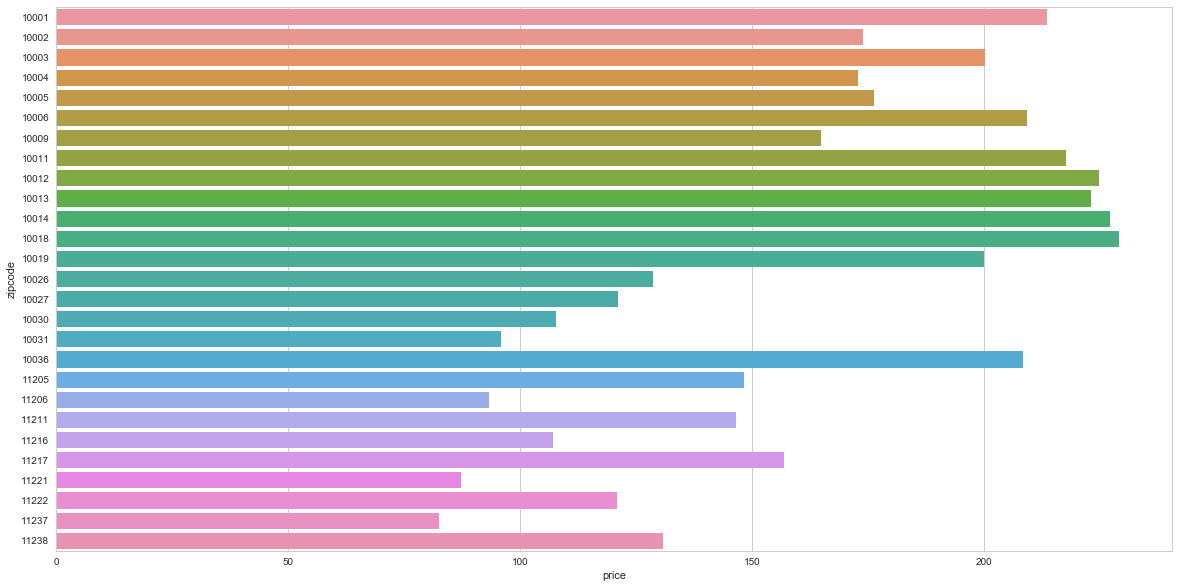

In [16]:
fig = plt.figure(figsize=(20,10))

sns.set(style="whitegrid", color_codes=True)

ax = sns.barplot(x="price", y="zipcode", data=topzip17, orient="h", ci=None)

# topzip17

In [17]:
topzip17 = pd.merge(topzip17,latlong,how='left',on='zipcode')

In [18]:
topzip17_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

topzip17_map.choropleth(geo_data="nyczip.geojson",
                     fill_opacity=0.5, line_opacity=0.5
                     ) 

for index, row in topzip17.iterrows():
    radius = row["price"]/10.0
    folium.CircleMarker(location=(row[3],
                                  row[4]),
                        radius=radius,
                        color='orange',
                        fill=True).add_to(topzip17_map)

### Out of the zipcodes with high Airbnb-to-population ratios, which are priced the highest? (spatially)

Understandably, Airbnb prices in Midtown to lower Manhattan are more expensive than similar "popular" Airbnb locations further away. This may suggest that there is a relationship between price and distance from a point that is centrally located in downtown Manhattan. Though this is only a subset of the data.
* What happens when we look at average Airbnb prices all over NYC?
* Are Airbnb customers paying for what other Airbnb customers consider "quality locations"?

In [19]:
topzip17_map

In [20]:
topzip17list = topzip17['zipcode']
topzip17list
topzip17df = airbnb17[airbnb17['zipcode'].isin(topzip17list)]
topzip17scoreloc = topzip17df[['zipcode','review_scores_location']]

top17scoreloc = pd.merge(topzip17scoreloc,latlong,how='left',on='zipcode')

In [21]:
top17scorelocagg = top17scoreloc.groupby(['zipcode'], as_index=False).agg('mean')
top17scorelocagg

zipcode  review_scores_location        lat       long
0     10001                9.722845  40.750672 -73.997281
1     10002                9.449807  40.715762 -73.986258
2     10003                9.872993  40.731829 -73.989181
3     10004                9.789474  40.688630 -74.018244
4     10005                9.788732  40.705974 -74.008768
5     10006                9.778261  40.709614 -74.012954
6     10009                9.601294  40.726408 -73.978636
7     10011                9.933255  40.742002 -74.000594
8     10012                9.925845  40.725581 -73.998078
9     10013                9.730063  40.720107 -74.004928
10    10014                9.946195  40.733698 -74.007033
11    10018                9.683185  40.755329 -73.993127
12    10019                9.832323  40.765793 -73.987067
13    10026                9.232227  40.802380 -73.952681
14    10027                9.250892  40.811819 -73.953224
15    10030                9.036253  40.818267 -73.942856
16    10031                9.092259  40.825294 -73.950056
17    10036                9.804780  40.759280 -73.989909
18    11205                9.311116  40.694698 -73.966301
19    11206                9.112659  40.701954 -73.942358
20    11211                9.712312  40.712597 -73.953098
21    11216                9.042079  40.680768 -73.949316
22    11217                9.799811  40.682306 -73.978099
23    11221                8.821243  40.691340 -73.927879
24    11222                9.617192  40.727790 -73.947605
25    11237                9.228686  40.704160 -73.921139
26    11238                9.569253  40.679171 -73.963804

In [22]:
topziplocscore_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

topziplocscore_map.choropleth(geo_data="nyczip.geojson",
                     fill_opacity=0.5, line_opacity=0.5
                     ) 

for index, row in top17scorelocagg.iterrows():
    radius = row["review_scores_location"]*3
    folium.CircleMarker(location=(row[2],
                                  row[3]),
                        radius=radius,
                        color='orange',
                        fill=True).add_to(topziplocscore_map)

### Are particular locations comparitively better than others? 

According to the average scores of the prime locations, they're similar to each other despite being vastly different neighborhoods. Is this characteristic of all locations? Does location not matter as long as you're in NYC?

In [23]:
topziplocscore_map

## Do Airbnb-to-population ratios correspond with average prices Airbnbs charge?

There isn't a strong correlation between the airbnb-population ratio and average Airbnb price.

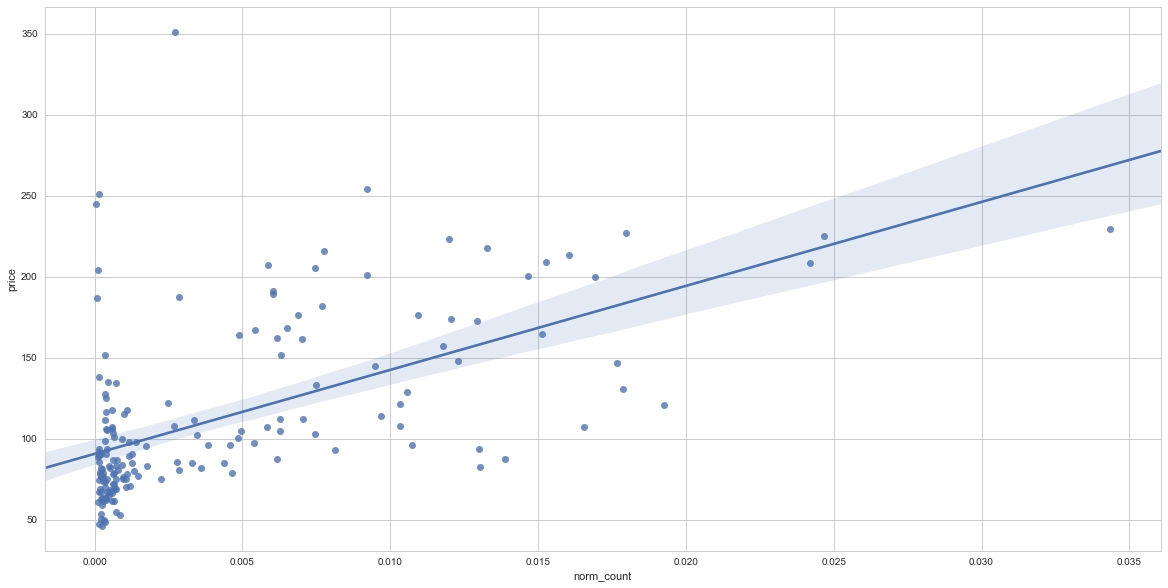

In [24]:
fig = plt.figure(figsize=(20,10))

sns.set(style="whitegrid", color_codes=True)

ax = sns.regplot(y="price", x="norm_count", data=norm17)

# topzip17

### Where is the datapoint with the price over 350 dollars? Why?

In [25]:
norm17[norm17.price > 300]['zipcode']


66    10007
Name: zipcode, dtype: int64

In [26]:
highprice_df = airbnb17[airbnb17.zipcode == 10007]
highprice_df['review_scores_location'].mean()

9.31578947368421

## Where are the Airbnb prices rising faster than rent prices?

In [3]:
az_df = air_zillow.dropna()
az_df.head(100)

date_zip  active_count  pr_ratio  median_list_price  month  year  \
1    201501_10002           902     19.59          1290000.0      1  2015   
3    201501_10004            44     23.50          3550000.0      1  2015   
4    201501_10005           111     23.86          1300000.0      1  2015   
6    201501_10007            31     28.11           870000.0      1  2015   
9    201501_10011           667     24.14          1855000.0      1  2015   
10   201501_10011           667     24.14          2267750.0      1  2015   
11   201501_10012           558     30.93          1910000.0      1  2015   
12   201501_10013           343     31.41          1150000.0      1  2015   
13   201501_10014           609     26.42          1089000.0      1  2015   
15   201501_10017           130     18.98           475000.0      1  2015   
16   201501_10017           130     18.98           499000.0      1  2015   
18   201501_10019           611     24.42           539000.0      1  2015   
19   201501_10021           152     24.02          1397500.0      1  2015   
20   201501_10022           171     23.38           370000.0      1  2015   
22   201501_10024           300     28.00          2200000.0      1  2015   
24   201501_10026           230     22.37           475000.0      1  2015   
25   201501_10026           230     22.37           269000.0      1  2015   
26   201501_10027           407     22.92           399500.0      1  2015   
29   201501_10030           147     18.12           425000.0      1  2015   
30   201501_10031           355     20.66           429000.0      1  2015   
31   201501_10032           217     19.42           569500.0      1  2015   
32   201501_10033           131     18.46           422449.5      1  2015   
34   201501_10035           175     23.47           488000.0      1  2015   
35   201501_10036           437     24.24           349900.0      1  2015   
36   201501_10036           437     24.24           434999.5      1  2015   
40   201501_10040           107     19.39           429000.0      1  2015   
42   201501_10065           167     27.88           169000.0      1  2015   
43   201501_10065           167     27.88           399500.0      1  2015   
44   201501_10075           152     24.48           119000.0      1  2015   
45   201501_10128           278     23.21           264950.0      1  2015   
..            ...           ...       ...                ...    ...   ...   
105  201501_11211           924     27.11           425000.0      1  2015   
106  201501_11212             5     13.93           404000.0      1  2015   
107  201501_11212             5     13.93           437950.0      1  2015   
108  201501_11213           160     28.22           405000.0      1  2015   
109  201501_11214             4     21.42           399000.0      1  2015   
110  201501_11215           359     26.48           429000.0      1  2015   
112  201501_11217           335     27.20           449450.0      1  2015   
114  201501_11219            13     27.32           399999.0      1  2015   
116  201501_11221           481     25.13           389000.0      1  2015   
117  201501_11221           481     25.13           359000.0      1  2015   
118  201501_11222           458     25.40           200000.0      1  2015   
119  201501_11223            11     28.02           399000.0      1  2015   
120  201501_11223            11     28.02           299999.0      1  2015   
183  201503_10002           772     21.65          1300000.0      3  2015   
185  201503_10004            40     24.33          3697500.0      3  2015   
186  201503_10005            81     23.95          5750000.0      3  2015   
187  201503_10005            81     23.95          1300000.0      3  2015   
189  201503_10007            33     27.97           950000.0      3  2015   
192  201503_10011           558     25.35          1775000.0      3  2015   
193  201503_10011           558     25.35          2495000.0      3  2015   
194  

In [17]:
dummy = pd.get_dummies(az_df['zip'])
dummy.head()

10001  10002  10003  10004  10005  10006  10007  10011  10012  10013  \
1      0      1      0      0      0      0      0      0      0      0   
3      0      0      0      1      0      0      0      0      0      0   
4      0      0      0      0      1      0      0      0      0      0   
6      0      0      0      0      0      0      1      0      0      0   
9      0      0      0      0      0      0      0      1      0      0   

   ...    11212  11213  11214  11215  11217  11219  11221  11222  11223  11224  
1  ...        0      0      0      0      0      0      0      0      0      0  
3  ...        0      0      0      0      0      0      0      0      0      0  
4  ...        0      0      0      0      0      0      0      0      0      0  
6  ...        0      0      0      0      0      0      0      0      0      0  
9  ...        0      0      0      0      0      0      0      0      0      0  

[5 rows x 81 columns]

In [19]:
df = pd.concat([az_df,dummy],axis=1)
df = df.drop(['date_zip','zip','date'],axis=1)
df.head()

active_count  pr_ratio  median_list_price  month  year  10001  10002  \
1           902     19.59          1290000.0      1  2015      0      1   
3            44     23.50          3550000.0      1  2015      0      0   
4           111     23.86          1300000.0      1  2015      0      0   
6            31     28.11           870000.0      1  2015      0      0   
9           667     24.14          1855000.0      1  2015      0      0   

   10003  10004  10005  ...    11212  11213  11214  11215  11217  11219  \
1      0      0      0  ...        0      0      0      0      0      0   
3      0      1      0  ...        0      0      0      0      0      0   
4      0      0      1  ...        0      0      0      0      0      0   
6      0      0      0  ...        0      0      0      0      0      0   
9      0      0      0  ...        0      0      0      0      0      0   

   11221  11222  11223  11224  
1      0      0      0      0  
3      0      0      0      0  
4      0      0      0      0  
6      0      0      0      0  
9      0      0      0      0  

[5 rows x 86 columns]

In [20]:
df.columns

Index([     'active_count',          'pr_ratio', 'median_list_price',
                   'month',              'year',               10001,
                     10002,               10003,               10004,
                     10005,               10006,               10007,
                     10011,               10012,               10013,
                     10014,               10016,               10017,
                     10019,               10021,               10022,
                     10024,               10025,               10026,
                     10027,               10030,               10031,
                     10032,               10033,               10035,
                     10036,               10038,               10040,
                     10065,               10075,               10128,
                     10280,               10301,               10302,
                     10303,               10304,               10305,
                    

In [26]:
# Your turn.
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('median_list_price ~ active_count + pr_ratio + month + year + 10001 +10002 + 10003 + 10004 + 10005 + 10006 + 10007 + 10011 + 10012 + 10013 + 10014 + 10016 + 10017 + 10019 + 10021 + 10022 + 10024 + 10025 + 10026 + 10027 + 10030 + 10031 + 10032 + 10033 + 10035 + 10036 + 10038 + 10040 + 10065 + 10075 + 10128 + 10280 + 10301 + 10302 + 10303 + 10304 + 10305 + 10306 + 10307 + 10308 + 10309 + 10310 + 10312 + 10314 + 10456 + 10457 + 10459 + 10461 + 10462 + 10463 + 10464 + 10465 + 10467 + 10469 + 10470 + 10471 + 10473 + 11004 + 11101 + 11103 + 11105 + 11201 + 11203 + 11204 + 11205 + 11206 + 11207 + 11208 + 11209 + 11210 + 11211 + 11212 + 11213 + 11214 + 11215 + 11217 + 11219 + 11221 + 11222 + 11223 + 11224',df).fit()
print(m.summary())

PatsyError: numbers besides '0' and '1' are only allowed with **
    median_list_price ~ active_count + pr_ratio + month + year + 10001 +10002 + 10003 + 10004 + 10005 + 10006 + 10007 + 10011 + 10012 + 10013 + 10014 + 10016 + 10017 + 10019 + 10021 + 10022 + 10024 + 10025 + 10026 + 10027 + 10030 + 10031 + 10032 + 10033 + 10035 + 10036 + 10038 + 10040 + 10065 + 10075 + 10128 + 10280 + 10301 + 10302 + 10303 + 10304 + 10305 + 10306 + 10307 + 10308 + 10309 + 10310 + 10312 + 10314 + 10456 + 10457 + 10459 + 10461 + 10462 + 10463 + 10464 + 10465 + 10467 + 10469 + 10470 + 10471 + 10473 + 11004 + 11101 + 11103 + 11105 + 11201 + 11203 + 11204 + 11205 + 11206 + 11207 + 11208 + 11209 + 11210 + 11211 + 11212 + 11213 + 11214 + 11215 + 11217 + 11219 + 11221 + 11222 + 11223 + 11224
                                                                 ^^^^^

In [25]:
# Your turn.
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('median_list_price ~ active_count + pr_ratio + month + year + zip',az_df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:      median_list_price   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     178.1
Date:                Sat, 08 Sep 2018   Prob (F-statistic):          2.96e-169
Time:                        19:41:53   Log-Likelihood:                -52388.
No. Observations:                3504   AIC:                         1.048e+05
Df Residuals:                    3498   BIC:                         1.048e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.224e+08   3.52e+07     -3.479   

Text(0.5,1,'Relationship between Original and Predicted Housing Prices')

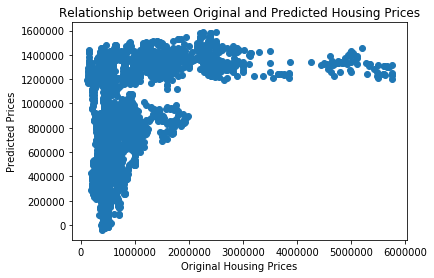

In [14]:
plt.scatter(az_df.median_list_price, m.fittedvalues)
plt.xlabel("Original Housing Prices")
plt.ylabel("Predicted Prices")
plt.title("Relationship between Original and Predicted Housing Prices")

In [15]:
# Your turn.
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

m2 = ols('median_list_price ~ + pr_ratio + year + zip',az_df).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:      median_list_price   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     295.7
Date:                Sat, 08 Sep 2018   Prob (F-statistic):          4.23e-171
Time:                        18:40:47   Log-Likelihood:                -52389.
No. Observations:                3504   AIC:                         1.048e+05
Df Residuals:                    3500   BIC:                         1.048e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.084e+08   3.37e+07     -3.211      0.0

Text(0.5,1,'Relationship between Original and Predicted Housing Prices')

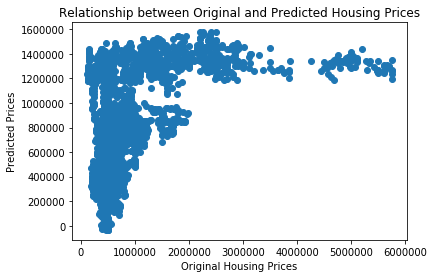

In [16]:
plt.scatter(az_df.median_list_price, m2.fittedvalues)
plt.xlabel("Original Housing Prices")
plt.ylabel("Predicted Prices")
plt.title("Relationship between Original and Predicted Housing Prices")